In [18]:
import roadvision3d
import yaml
import os
import numpy as np

from roadvision3d.src.datasets.kitti import KITTI
from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.datasets.kitti_utils import get_objects_from_label

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_id = '000001'

img_path = '/home/javier/datasets/kitti/training/image_2/' + data_id + '.png'
label_path = '/home/javier/datasets/kitti/training/label_2/' + data_id + '.txt'
calib_path = '/home/javier/datasets/kitti/training/calib/' + data_id + '.txt'

In [3]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/kitti_v2.yaml'
checkpoint_path = 'asdf'

In [4]:
# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

In [5]:
print(cfg)

{'dataset': {'type': 'kitti', 'data_dir': '/home/javier/datasets/kitti', 'label_dir': '/home/javier/datasets/kitti/training/label_2', 'eval_cls': ['Car', 'Pedestrian', 'Cyclist'], 'batch_size': 24, 'num_workers': 16, 'class_merging': False, 'use_dontcare': False, 'use_3d_center': True, 'writelist': ['Car', 'Pedestrian', 'Cyclist'], 'random_flip': 0.5, 'random_crop': 0.5, 'scale': 0.4, 'shift': 0.1, 'drop_last_val': True}, 'model': {'type': 'MonoLSS', 'backbone': 'dla34', 'neck': 'DLAUp'}, 'optimizer': {'type': 'adam', 'lr': 0.001, 'weight_decay': 1e-05}, 'lr_scheduler': {'warmup': True, 'decay_rate': 0.1, 'decay_list': [90, 120]}, 'trainer': {'max_epoch': 150, 'eval_start': 10, 'eval_frequency': 10, 'save_frequency': 50, 'disp_frequency': 10, 'log_dir': 'work_dirs/MonoLSS/logs/', 'out_dir': 'work_dirs/MonoLSS/output/'}, 'tester': {'threshold': 0.2, 'out_dir': './MonoLSS/testset_out', 'resume_model': '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS/logs/checkpoints/checkpoint_epoch_

In [6]:
# build dataloader or load de data manually
data = KITTI(split='train', cfg=cfg['dataset'])

In [7]:
data_id = 8
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

<class 'PIL.PngImagePlugin.PngImageFile'>


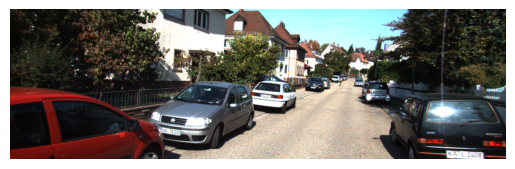

In [8]:
print(type(img))
# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # No mostrar los ejes para una mejor visualización
plt.show()

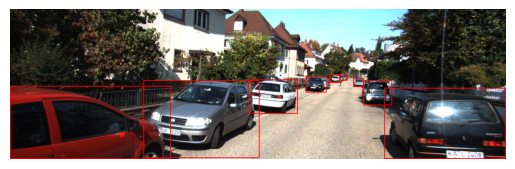

In [9]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

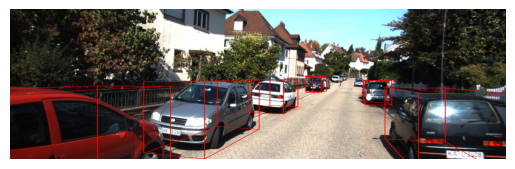

In [10]:
img_3d = img.copy()
draw_3d_bboxes(img_3d, labels, calib)

## VIZ results of eval

In [11]:
labels_eval = get_objects_from_label('/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS/output/EPOCH_150/data/000008.txt')

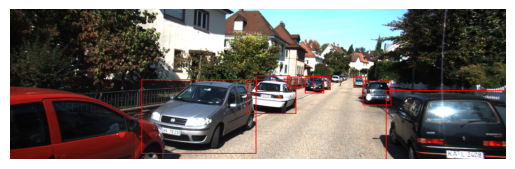

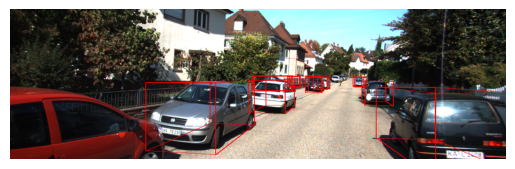

In [13]:
img_2d_eval = img.copy()
draw_2d_bboxes(img_2d_eval, labels_eval)
img_3d_eval = img.copy()
draw_3d_bboxes(img_3d_eval, labels_eval, calib)